In [19]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [20]:
import numpy as np
import pandas as pd
import scipy.stats as sts

In [21]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [22]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [23]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [24]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [25]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [26]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [27]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [28]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

    # Calculate the date 1 year ago from the last data point in the database

    # Perform a query to retrieve the data and precipitation scores

    # Save the query results as a Pandas DataFrame and set the index to the date column

    # Sort the dataframe by date

results = session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date >= '2016-08-23').\
    order_by(Measurement.date.desc()).all()
precipitation =  pd.DataFrame (results,columns=['date','prcp'])
precipitation["date"] = pd.to_datetime(precipitation["date"])
precipitation = precipitation.set_index('date',drop=False)
precipitation = precipitation.dropna()
precipitation.head()

,date,prcp
date,,
2017-08-23,2017-08-23,0.00
2017-08-23,2017-08-23,0.00
2017-08-23,2017-08-23,0.08
2017-08-23,2017-08-23,0.45
2017-08-22,2017-08-22,0.00


<function matplotlib.pyplot.show(close=None, block=None)>

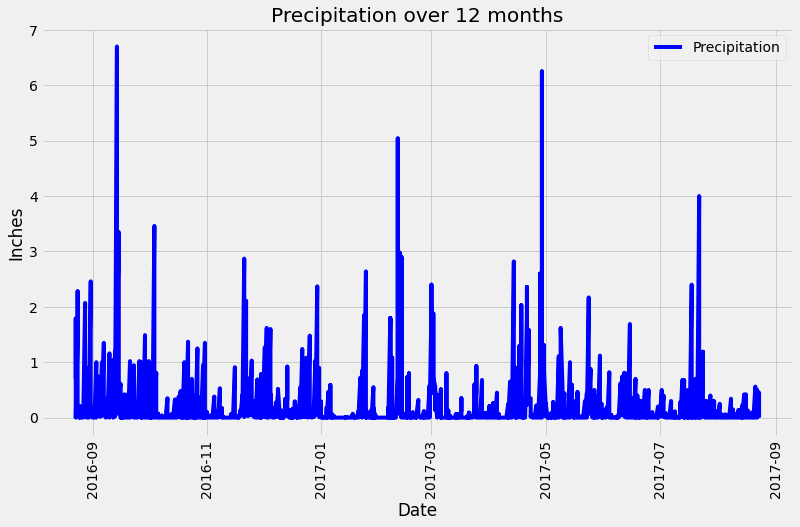

In [29]:
# Use Pandas Plotting with Matplotlib to plot the data
dates = precipitation["date"]
precip = precipitation["prcp"]

plt.figure(figsize=(12,7))
precipitation, = plt.plot(dates,precip, color="blue", label="Precipitation")
plt.title("Precipitation over 12 months")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(rotation='vertical')
plt.legend(handles=[precipitation], loc='best')
plt.grid(b=True)
plt.show

In [30]:
# Use Pandas to calcualte the summary statistics for the precipitation data

max_numpy = np.amax(precip)
print(f"The maximum precipitation is {max_numpy}")

max_numpy = np.amin(precip)
print(f"The minimum precipitation is {max_numpy}")

mean_numpy = np.mean(precip)
print(f"The mean precipitation is {mean_numpy}")

median_numpy = np.median(precip)
print(f"The median precipitation is {median_numpy}")

mode_scipy = sts.mode(precip)
print(f"The mode precipitation is {mode_scipy}")

var_numpy = np.var(precip,ddof = 0)
print(f"The population variance using the NumPy module is {var_numpy}")

sd_numpy = np.std(precip,ddof = 0)
print(f"The population standard deviation using the NumPy module is {sd_numpy}")

print(f"Roughly 68% of the data is between {round(mean_numpy-sd_numpy,3)} and {round(mean_numpy+sd_numpy,3)}")
print(f"Roughly 95% of the data is between {round(mean_numpy-2*sd_numpy,3)} and {round(mean_numpy+2*sd_numpy,3)}")
print(f"Roughly 99.7% of the data is between {round(mean_numpy-3*sd_numpy,3)} and {round(mean_numpy+3*sd_numpy,3)}")

z_scipy = sts.zscore(precip)
print(f"The z-scores using the SciPy module are {z_scipy}")

The maximum precipitation is 6.7
The minimum precipitation is 0.0
The mean precipitation is 0.17727857496288904
The median precipitation is 0.02
The mode precipitation is ModeResult(mode=array([0.]), count=array([874]))
The population variance using the NumPy module is 0.21259051566664727
The population standard deviation using the NumPy module is 0.46107539043701656
Roughly 68% of the data is between -0.284 and 0.638
Roughly 95% of the data is between -0.745 and 1.099
Roughly 99.7% of the data is between -1.206 and 1.561
The z-scores using the SciPy module are [-0.38448935 -0.38448935 -0.21098193 ... -0.34111249  3.49773911
  1.13370055]


In [31]:
stat = precip.describe()
stat = pd.DataFrame({'precipitation':stat})
stat

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [32]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(Measurement).group_by(Measurement.station).count()
print(stations)

9


In [33]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc()).all()
print(active_stations)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [34]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
lowest_temperature = session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').first()
highest_temperature = session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').first()    
average_temperature = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').first()
     
print(f"The lowest temperature at Station USC00519281 is {lowest_temperature}")
print(f"The highest temperature at Station USC00519281 is {highest_temperature}")
print(f"The average temperature at Station USC00519281 is {average_temperature}")

The lowest temperature at Station USC00519281 is (54.0,)
The highest temperature at Station USC00519281 is (85.0,)
The average temperature at Station USC00519281 is (71.66378066378067,)


<function matplotlib.pyplot.show(close=None, block=None)>

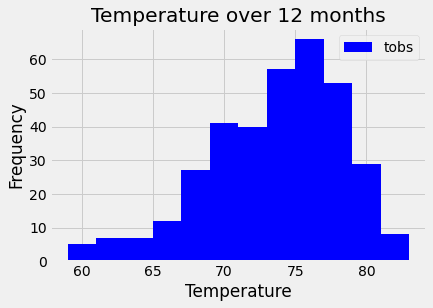

In [35]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= '2016-08-23').\
    order_by(Measurement.date.desc()).all()
temperature =  pd.DataFrame (results,columns=['date','tobs'])
temperature["date"] = pd.to_datetime(temperature["date"])
temperature = temperature.set_index('date',drop=False)
temperature = temperature.dropna()

#dates = precipitation["date"]
temps = temperature["tobs"]

plt.hist(temps, bins=12, color="blue", label="tobs")
plt.title("Temperature over 12 months")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(loc='best')
plt.grid(b=True)
plt.show

## Bonus Challenge Assignment

In [36]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [37]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [38]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [39]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [40]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [41]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [42]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [43]:
# Plot the daily normals as an area plot with `stacked=False`
